In [24]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb

In [25]:
# Read the dataset into a dataframe
dataset = pd.read_csv('C:/Users\Youssef/Desktop/stage/training-tweets.csv', engine='python')
dataset.head()

,Tweet’s id,Username,Followers,Retweet,Friends,Listed,Text,Location,Winner
0,1.457794e+08,MrKinto,81,43,151,4,RT @joshgreenman: Trump explicitly said we sho...,"Tokyo-to, Japan",Trump
1,7.090000e+17,TrumpsToxic,669,1,652,7,RT @natespuewell: #VPDebate\r\n\r\nPence follo...,"Florida, USA",Trump
2,9.070318e+08,Laurel05728614,6,56,152,0,RT @sallykohn: Basically Trump/Pence's entire ...,NaN,Trump
3,2.357730e+09,a40019380,97,1438,75,6,"RT @ezraklein: It sort of works in the debate,...",NaN,Trump
4,4.380516e+07,jlynn122,120,211,682,5,RT @RichLowry: Pence shakes his head in incred...,"Ronkonkoma, NY",Trump


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
Tweet’s id    40000 non-null float64
Username      40000 non-null object
 Followers    40000 non-null int64
 Retweet      40000 non-null int64
 Friends      40000 non-null int64
 Listed       40000 non-null int64
 Text         40000 non-null object
 Location     26129 non-null object
Winner        40000 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ MB


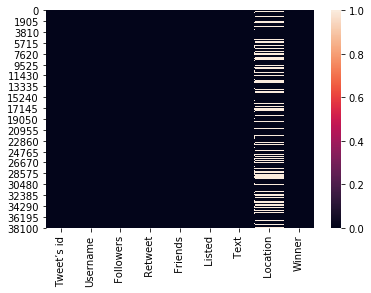

In [26]:
# info() function to get details about the data types of the dataset
dataset.info()
# seaborn’s heatmap() function to check which values are null
sb.heatmap(dataset.isnull())

In [27]:
# Drop all rows with missin data
dataset = dataset.dropna()

In [28]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
dataset = dataset.drop(dataset.columns[[1, 6, 7]], axis='columns')
dataset.head(1)

,Tweet’s id,Followers,Retweet,Friends,Listed,Winner
0,145779439.0,81,43,151,4,Trump


In [29]:
# Split 'Winner' column ( not numeric ) into new numeric column
dummy = pd.get_dummies(dataset['Winner'])
dummy.head()
dataset = pd.concat((dataset, dummy), axis=1)
dataset.head()
dataset = dataset.drop(['Winner'], axis=1)
dataset = dataset.drop(['Clinton'], axis=1)
dataset = dataset.rename(columns={"Trump":"Winner"})
dataset.head(1)

,Tweet’s id,Followers,Retweet,Friends,Listed,Winner
0,145779439.0,81,43,151,4,1


In [30]:
# Seperate the dataframe into X and y data
X = dataset.values
y = dataset['Winner'].values
# Delete the Vote column from X
X = np.delete(X,5,axis=1)

In [31]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
# Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.5727771399413191

In [33]:
"""Confusion Matrix of Decision Tree classifier
So we know know many true-positives(an outcome where the model correctly predicts the positive class), 
and false positive (an outcome where the model incorrectly predicts the positive class)
First we obtain y_pred, then we import confusion_matrix from sklearn.metrics."""
y_pred = dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2051, 1848],
       [1501, 2439]], dtype=int64)

In [34]:
# Random Forests Classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8418165582344687

In [35]:
# Gradient Boosting Classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.6198494705957392

In [36]:
#  Gradient booster : Upgrade
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.5965046562061488

In [37]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.5133307819874984

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(X_test, y_test)
sv_clf.score(X_test, y_test)

In [38]:
# Logistic Regressions Classifier
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

C:\Users\Youssef\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4973848705191989